In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver
import time

# Define ODE problem

In [2]:
def f(t, y):
    '''
        dy/dt = f(t, y)
        This is f() function on the right
    '''    
    
    return [t*(998*y[0] + 1998*y[1]), -999*y[0] - 1999*y[1]]

t = np.linspace(0, 2.0, 11).reshape(-1,1) # training points
y0_list = [2, -1]

# Reference solution

In [3]:
sol = solve_ivp(f, [t.min(), t.max()], y0_list, method='Radau', rtol=1e-5)

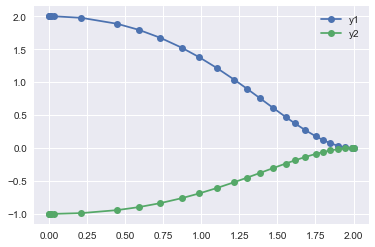

In [4]:
plt.plot(sol.t, sol.y[0], marker='o', label='y1')
plt.plot(sol.t, sol.y[1], marker='o', label='y2')
plt.legend()

# Neural net training

In [5]:
nn = NNSolver(f, t, y0_list, n_hidden=20)
nn

Neural ODE Solver 
Number of equations:       2 
Initial condition y0:      [2, -1] 
Numnber of hidden units:   20 
Number of training points: 11 

In [7]:
def plot_loss_compare(model, maxiter = 1000, iprint = 200):
    model.reset_weights()
    save_init_paras_list = model.params_list
    save_init_flattened_params = model.flattened_params
    
    
    methods = ['CG','BFGS','L-BFGS-B']
    
    plt.figure(figsize=(8,6))
    for method in methods:
        
        model.params_list = save_init_paras_list
        model.flattened_params = save_init_flattened_params
        
        start_time = time.time()
        model.train(method = method, maxiter=maxiter, iprint=iprint)
        duration = time.time() - start_time
        
        plt.semilogy(range(len(model.loss)), model.loss, label = method + '  %time {}s'.format(round(duration,2)))
        
    plt.legend()
    plt.title("Log Loss Comparision", fontsize = 15)
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.show()

iteration: 0 loss:  124282.289406
iteration: 200 loss:  4.92989599683
iteration: 400 loss:  3.6093565999
iteration: 600 loss:  2.98422919495
iteration: 800 loss:  1.50998292004
         Current function value: 1.122101
         Iterations: 1000
         Function evaluations: 2359
         Gradient evaluations: 2359
iteration: 0 loss:  124282.289406
iteration: 200 loss:  0.0724328090067
iteration: 400 loss:  0.0581277253141
iteration: 600 loss:  0.012839883076
iteration: 800 loss:  0.00401656186832
         Current function value: 0.000219
         Iterations: 1000
         Function evaluations: 1203
         Gradient evaluations: 1203
iteration: 0 loss:  124432.882382
iteration: 200 loss:  0.227566867408
iteration: 400 loss:  0.120864416309
iteration: 600 loss:  0.0976704078976


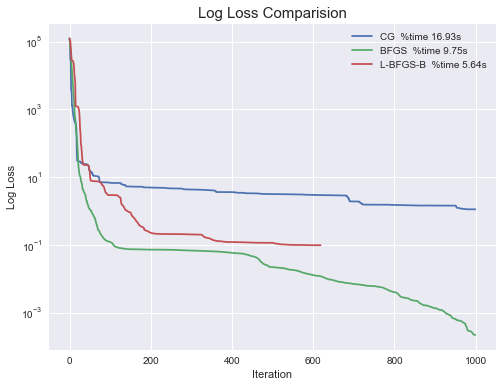

In [8]:
plot_loss_compare(nn)

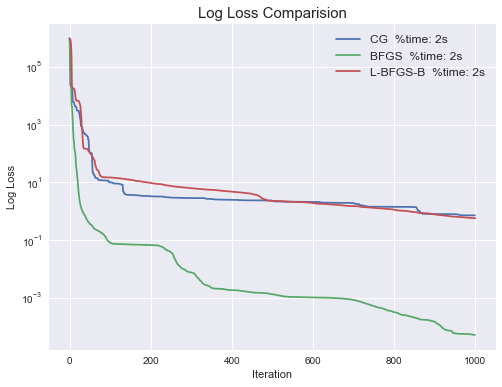

In [100]:
plt.figure(figsize=(8,6))
plt.semilogy(range(len(loss_CG)), loss_CG, label = 'CG  %time: 2s')
plt.semilogy(range(len(loss_BFGS)), loss_BFGS, label = 'BFGS  %time: 2s')
plt.semilogy(range(len(loss_LB)), loss_LB,label =  'L-BFGS-B  %time: 2s')
plt.legend(fontsize = 12)
plt.title("Log Loss Comparision", fontsize = 15)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.show()

# Verifying training set

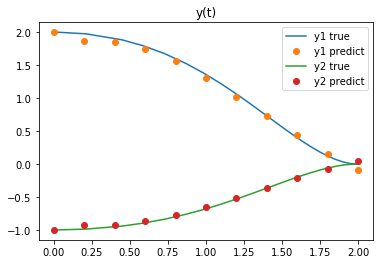

In [7]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, sol.y[0], label='y1 true')
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')
plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('y(t)')

# Out-of sample prediction

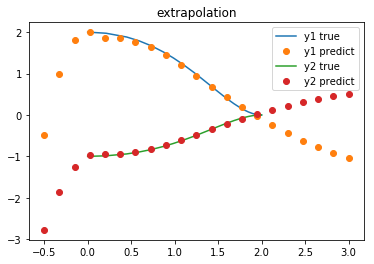

In [8]:
t_test = np.linspace(-0.5, 3.0, 21).reshape(-1,1)
y_pred_list, dydt_pred_list = nn.predict(t=t_test)

plt.plot(sol.t, sol.y[0], label='y1 true')
plt.plot(t_test, y_pred_list[0], 'o', label='y1 predict')
plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t_test, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('extrapolation')

# API Docs

In [9]:
help(NNSolver.__init__)

Help on function __init__ in module neuralsolver.core:

__init__(self, f, t, y0_list, n_hidden=10)
    Neural Network Solver Class
    
    Parameters
    ----------
    f : callable
        Right-hand side of the ODE system dy/dt = f(t, y).
        Similar to the input for scipy.integrate.solve_ivp()
    
        Important notes:
        - Must use autograd's numpy inside f (import autograd.numpy as np)
        - For a single ODE, should return a list of one element.
    
    t : column vector, i.e. numpy array of shape (n, 1)
        Training points
    
    y0_list : a list of floating point numbers
        Initial condition.
        For a single ODE, should be a list of one element.
    
    n_hidden : integer, optional
        Number of hidden units of the NN



In [10]:
help(nn.train)

Help on method train in module neuralsolver.core:

train(method='BFGS', maxiter=2000, iprint=200) method of neuralsolver.core.NNSolver instance
    Train the neural net
    
    Parameters
    ----------
    method : string, optional
        Optimization method for scipy.optimize.minimize()
        'BFGS' should be the most robust one
    
    maxiter : integer, optional
        Maximum number of iterations
    
    maxiter : integer, optional
        Print loss per iprint step



In [11]:
help(nn.reset_weights)

Help on method reset_weights in module neuralsolver.core:

reset_weights() method of neuralsolver.core.NNSolver instance
    reinitialize NN weights (randomly)



In [12]:
help(nn.predict)

Help on method predict in module neuralsolver.core:

predict(t=None) method of neuralsolver.core.NNSolver instance
    Make new predicts
    
    Parameters
    ----------
    t : column vector, i.e. numpy array of shape (n, 1), optional
        use training points by default

